# <center> Лабораторная работа №3 "Деревья решений. Классификатор пола по голосу"
### <center> Воложанин Владислав Олегович ИВТ 1.3 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection 
from sklearn import metrics

In [2]:
voice_data = pd.read_csv('voice_gender.csv')
print(voice_data.head())

print(f"Пропущенные: {voice_data.isnull().sum().sum()}")

features = voice_data.drop('label', axis=1).columns
X, y = voice_data[features], voice_data['label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Тренировочная:', X_train.shape)
print('Тестовая:', X_test.shape)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

### <center> Задача №1 "Решающие пни"

In [3]:
from sklearn import tree
decision_tree_model1 = tree.DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=1, 
    random_state=42)
decision_tree_model1

decision_tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

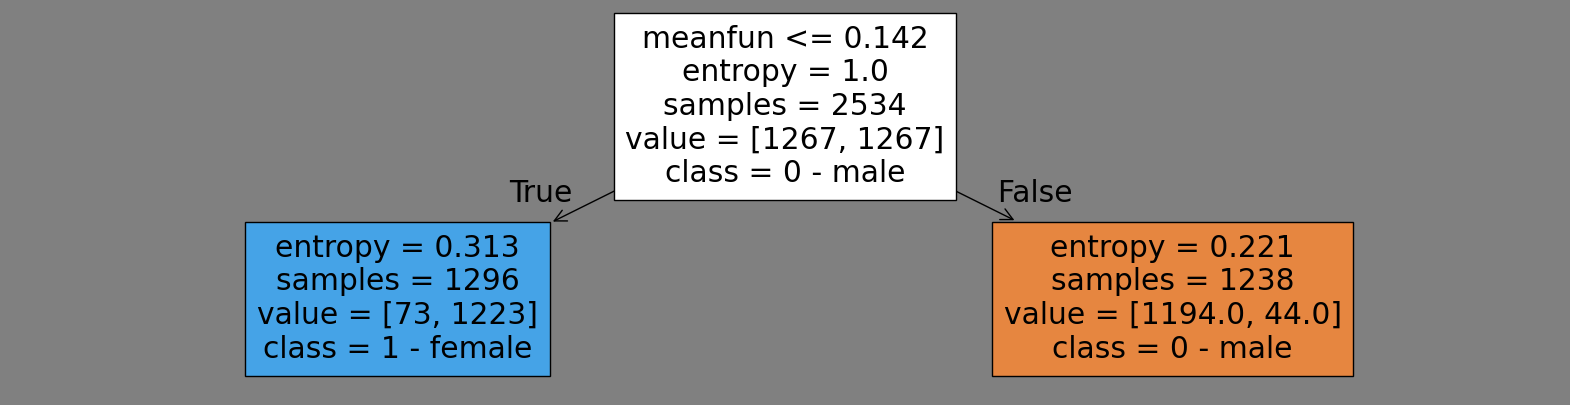

In [4]:
figure = plt.figure(figsize=(20, 5))
figure.patch.set_facecolor('gray')

Graph = tree.plot_tree(
    decision_tree_model1,
    feature_names=X.columns,
    class_names=["0 - male", "1 - female"],
    filled=True,)

In [5]:
from sklearn.metrics import accuracy_score

y_pred_test_depth1 = decision_tree_model1.predict(X_test)
accuracy_depth1 = accuracy_score(y_test, y_pred_test_depth1)
accuracy_depth1_rounded = round(accuracy_depth1, 3)

print("accuracy на тестовой выборке с глубиной 1:", accuracy_depth1_rounded)

accuracy на тестовой выборке с глубиной 1: 0.956


### <center> Задача №2 "Увеличение глубины дерева"

In [6]:
decision_tree_model2 = tree.DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=2, 
    random_state=42)
decision_tree_model2

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [7]:
decision_tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

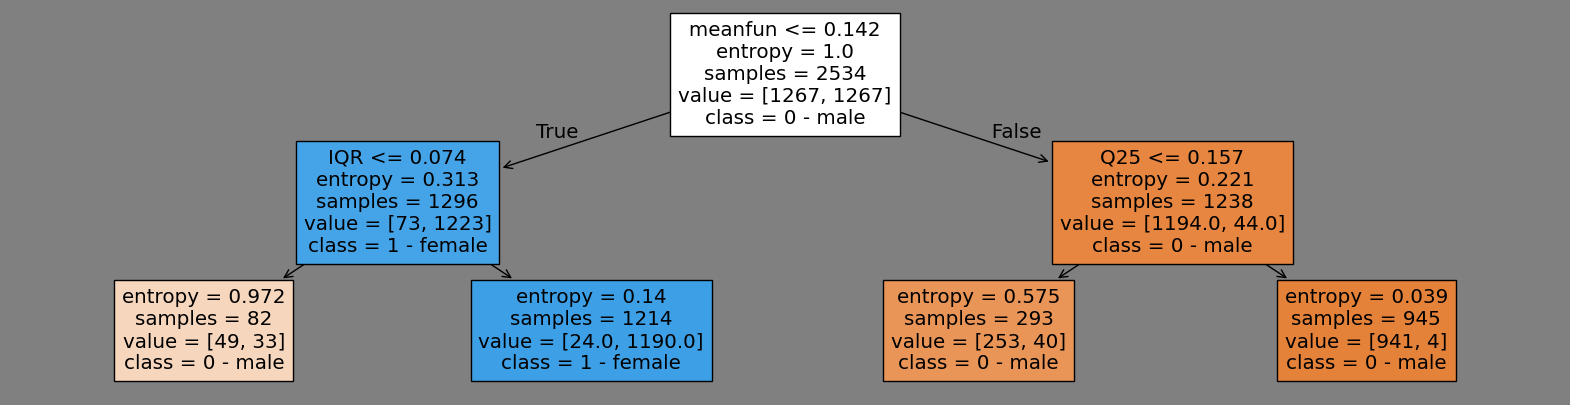

In [8]:
figure1 = plt.figure(figsize=(20, 5))
figure1.patch.set_facecolor('gray')
tree_graph = tree.plot_tree(
    decision_tree_model2,
    feature_names=X.columns,
    class_names=["0 - male", "1 - female"],
    filled=True,)

In [9]:
y_pred_test_depth2 = decision_tree_model2.predict(X_test)
accuracy_depth2 = accuracy_score(y_test, y_pred_test_depth2)
accuracy_depth2_rounded = round(accuracy_depth2, 3)
print("accuracy на тестовой выборке с глубиной 2:", accuracy_depth2_rounded)

accuracy на тестовой выборке с глубиной 2: 0.962


### <center> Задача №3 "Б’ольшая свобода"

In [10]:
decision_tree_model3 = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=0)
decision_tree_model3

decision_tree_model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
depth = decision_tree_model3.get_depth()
n_leaves = decision_tree_model3.get_n_leaves()
print(f'Глубина дерева: {depth}')
print(f'Количество в дереве: {n_leaves}')

Глубина дерева: 12
Количество в дереве: 54


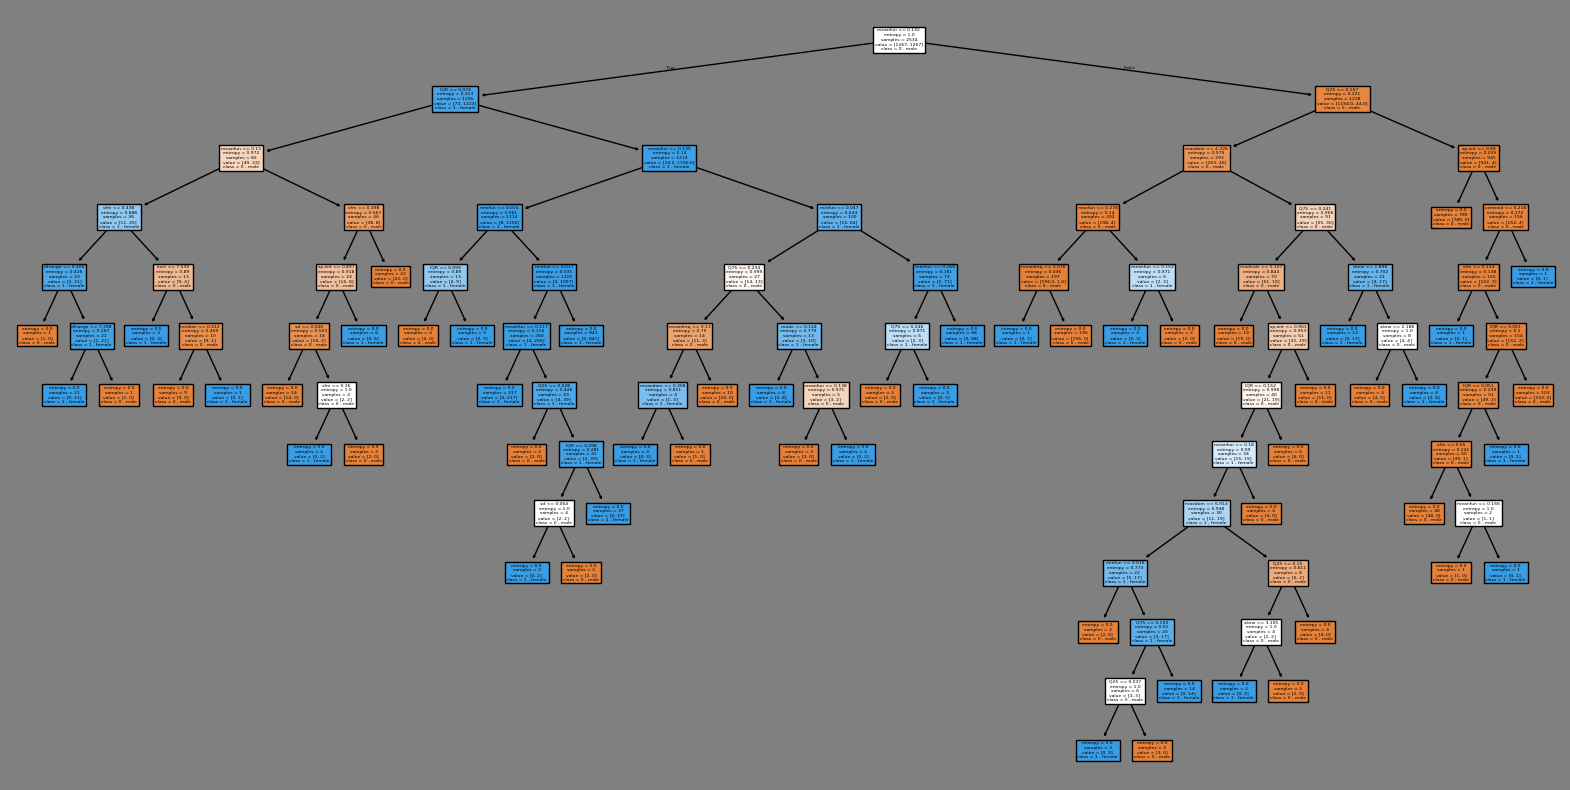

In [12]:
figure3 = plt.figure(figsize=(20, 10))
figure3.patch.set_facecolor('gray')
tree_graph = tree.plot_tree(
    decision_tree_model3,
    feature_names=X.columns,
    class_names=["0 - male", "1 - female"],
    filled=True,)

In [13]:
y_pred_test_depth3_test = decision_tree_model3.predict(X_test)
y_pred_test_depth3_train = decision_tree_model3.predict(X_train)

accuracy_depth3_test = accuracy_score(y_test, y_pred_test_depth3_test)
accuracy_depth3_train = accuracy_score(y_train, y_pred_test_depth3_train)
accuracy_depth3_rounded_test = round(accuracy_depth3_test, 3)
accuracy_depth3_rounded_train = round(accuracy_depth3_train, 3)

print("Значение метрики accuracy на тестовой выборке для свободной модели:", accuracy_depth3_rounded_test)
print("Значение метрики accuracy на тренировочной выборке для свободной модели:", accuracy_depth3_rounded_train)

Значение метрики accuracy на тестовой выборке для свободной модели: 0.973
Значение метрики accuracy на тренировочной выборке для свободной модели: 1.0


### <center> Задача №4 "Оптимальные внешние параметры"

In [14]:
decision_tree_model_optimal = tree.DecisionTreeClassifier()
decision_tree_model_optimal

DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]}

cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=decision_tree_model_optimal, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("параметры:", best_params)
print("качества модели:", best_score)

параметры: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3}
качества модели: 0.9660624770992664


In [16]:
decision_tree_model_best = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=3)
decision_tree_model_best

decision_tree_model_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

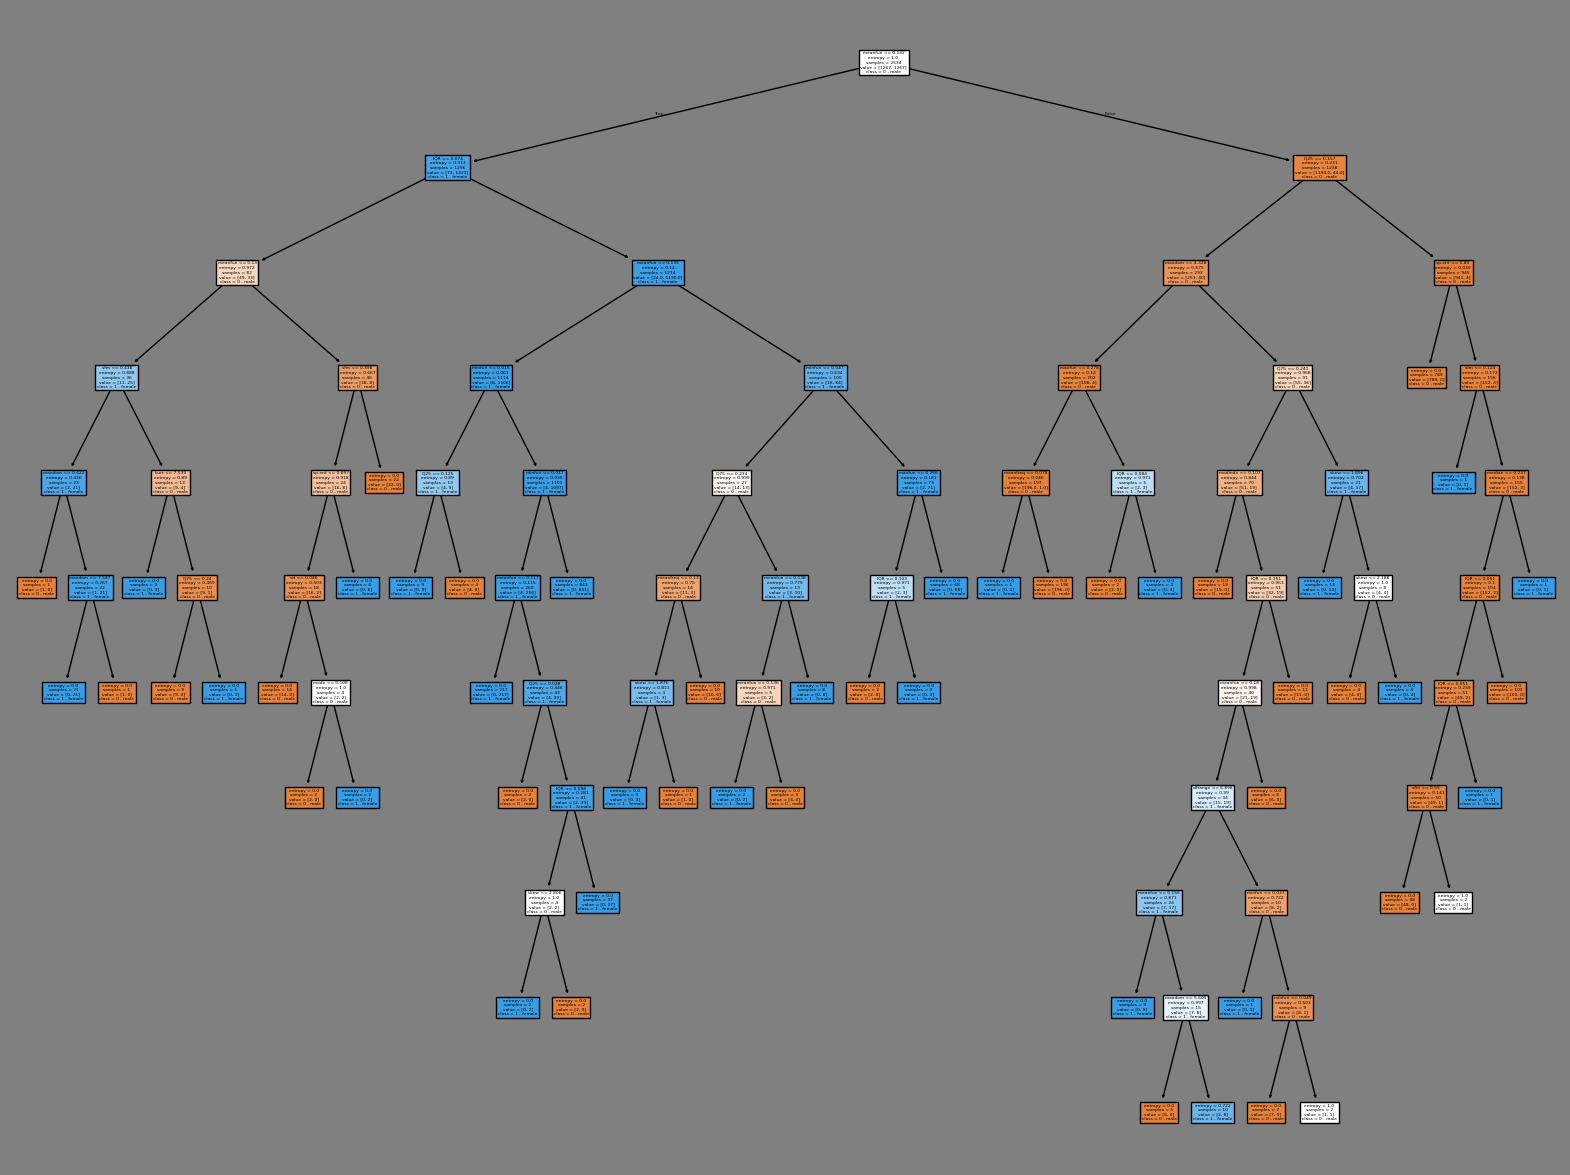

In [17]:
figure3 = plt.figure(figsize=(20, 15))
figure3.patch.set_facecolor('gray')
tree_graph = tree.plot_tree(
    decision_tree_model_best,
    feature_names=X.columns,
    class_names=["0 - male", "1 - female"],
    filled=True,)

In [18]:
y_pred_test_best_test = decision_tree_model_best.predict(X_test)
y_pred_test_best_train = decision_tree_model_best.predict(X_train)

accuracy_best_test = accuracy_score(y_test, y_pred_test_best_test)
accuracy_best_train = accuracy_score(y_train, y_pred_test_best_train)

accuracy_best_rounded_test = round(accuracy_best_test, 3)
accuracy_best_rounded_train = round(accuracy_best_train, 3)

print("accuracy для оптимальной модели:", accuracy_best_rounded_test)
print("Значение для оптимальной модели:", accuracy_best_rounded_train)

accuracy для оптимальной модели: 0.972
Значение для оптимальной модели: 0.998


### <center> Задача №5 "Важность факторов"

In [19]:
print(decision_tree_model_best.feature_importances_)

[0.00646521 0.00200519 0.00236218 0.03473571 0.01005132 0.07515485
 0.00871931 0.0027297  0.00929051 0.01179705 0.00158555 0.
 0.77013674 0.02201225 0.00903791 0.         0.         0.02757345
 0.00219588 0.00414718]


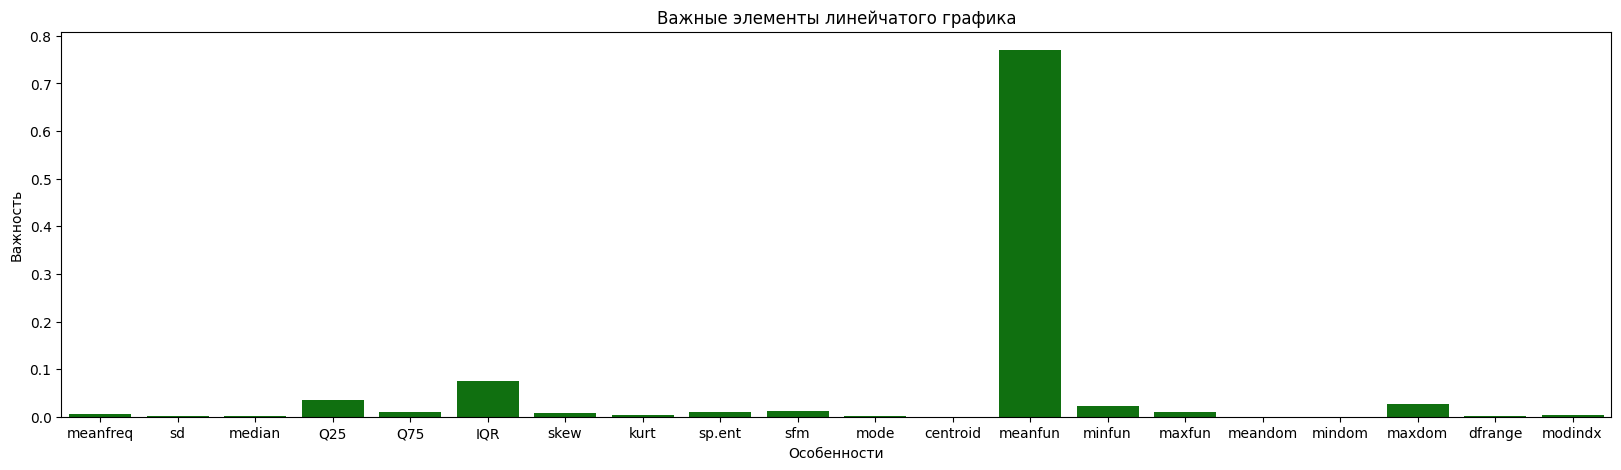

In [20]:
fig, ax = plt.subplots(figsize=(20, 5))
feature = X.columns
feature_importances = decision_tree_model_best.feature_importances_ 
sns.barplot(x=feature, y=feature_importances, ax=ax, color='green')
ax.set_title('Важные элементы линейчатого графика')
ax.set_xlabel('Особенности')
ax.set_ylabel('Важность')
plt.show()

Топ 3 наиболее важных фактора: meanfun, IQR, Q25  